<a href="https://colab.research.google.com/github/blessey15/ClassifyBea/blob/main/classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd /content/drive/MyDrive/classifyapp

/content/drive/MyDrive/classifyapp


In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
print(tf.__version__)

2.4.1


In [ ]:
import cv2,os
data_path='/content/drive/MyDrive/classifyapp/images/'
categories=os.listdir(data_path)
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) #empty dictionary
print(label_dict)
print(categories)
print(labels)

{'JackFruit': 0, 'Mango': 1}
['JackFruit', 'Mango']
[0, 1]


In [ ]:
img_size=100
data=[]
target=[]

for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:  
            resized=cv2.resize(img,(img_size,img_size))
            #resizing the image  into 100x100, since we need a fixed common size for all the images in the dataset
            data.append(resized)
            target.append(label_dict[category])
            #appending the image and the label(categorized) into the list (dataset)
        except Exception as e:
            print('Exception:',e)
            #if any exception rasied, the exception will be printed here. And pass to the next image

In [ ]:
import numpy as np
data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,3))
target=np.array(target)
from keras.utils import np_utils
new_target=np_utils.to_categorical(target)

In [ ]:
new_target.shape

(137, 2)

In [ ]:
data.shape

(137, 100, 100, 3)

In [ ]:
data.shape[1:]

(100, 100, 3)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(200, (3,3), activation='relu', input_shape=(100, 100, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(100, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])


In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 200)       5600      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 200)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 100)       180100    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 100)       0         
_________________________________________________________________
dropout (Dropout)            (None, 23, 23, 100)       0         
_________________________________________________________________
flatten (Flatten)            (None, 52900)             0         
_________________________________________________________________
dense (Dense)                (None, 50)                2

In [ ]:
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,new_target,test_size=0.1)

In [ ]:
train_data.shape

(123, 100, 100, 3)

In [ ]:
train_target.shape

(123, 2)

In [ ]:
history=model.fit(train_data,train_target,epochs=200,validation_split=0.2)

Epoch 1/200
4/4 [==============================] - 32s 470ms/step - loss: 0.7169 - accuracy: 0.4605 - val_loss: 1.2321 - val_accuracy: 0.6000
Epoch 2/200
4/4 [==============================] - 0s 80ms/step - loss: 1.0527 - accuracy: 0.5147 - val_loss: 0.7354 - val_accuracy: 0.4000
Epoch 3/200
4/4 [==============================] - 0s 78ms/step - loss: 0.6906 - accuracy: 0.5274 - val_loss: 0.6689 - val_accuracy: 0.4800
Epoch 4/200
4/4 [==============================] - 0s 79ms/step - loss: 0.6317 - accuracy: 0.6001 - val_loss: 0.6583 - val_accuracy: 0.6000
Epoch 5/200
4/4 [==============================] - 0s 83ms/step - loss: 0.7189 - accuracy: 0.5129 - val_loss: 0.5755 - val_accuracy: 0.8000
Epoch 6/200
4/4 [==============================] - 0s 82ms/step - loss: 0.6127 - accuracy: 0.6511 - val_loss: 0.5669 - val_accuracy: 0.6800
Epoch 7/200
4/4 [==============================] - 0s 82ms/step - loss: 0.5638 - accuracy: 0.7611 - val_loss: 1.0892 - val_accuracy: 0.4000
Epoch 8/200
4/4 [=

In [ ]:
model.save('model.h5')

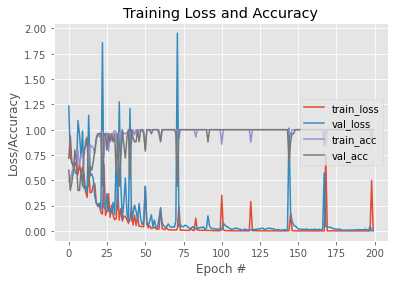

In [ ]:
import matplotlib.pyplot as plt

N = 200
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), history.history["accuracy"], label="train_acc")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("CNN_Model")